In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

demographics_csv = "data/demographics.csv"
demographics_df = pd.read_csv(demographics_csv, low_memory=False)

# Version numbers are meaningless
sixminutev4 = pd.read_csv('data/6minutewalkV4-V2.csv') # table 
sixminutev6 = pd.read_csv('data/6minutewalkV4-V6.csv')
sixminutev1 = pd.read_csv('data/6minutewalkV4-V1.csv') # table
sixminutev2 = pd.read_csv('data/6minutewalkV2.csv')
cvhealth = pd.read_csv('data/CVHealth.csv')

demographics_df.drop(columns=['ROW_ID', 'ROW_VERSION', 'appVersion', 'phoneInfo', 'dataGroups', 'uploadDate', 'createdOn', 
                  'validationErrors', 'userSharingScope', 'NonIdentifiableDemographics.json.patientGoSleepTime', 
                  'NonIdentifiableDemographics.patientGoSleepTime', 'createdOnTimeZone',
                 'NonIdentifiableDemographics.json.patientWakeUpTime', 'NonIdentifiableDemographics.patientWakeUpTime'
                 , 'externalId'], 
         inplace=True)
demographics_df.rename(columns={'NonIdentifiableDemographics.json.patientWeightPounds': 'weight', 'NonIdentifiableDemographics.patientWeightPounds': 'weight2', 
                    'NonIdentifiableDemographics.json.patientBiologicalSex': 'sex', 
                    'NonIdentifiableDemographics.patientBiologicalSex': 'sex2',
                   'NonIdentifiableDemographics.json.patientHeightInches': 'height',
                   'NonIdentifiableDemographics.patientHeightInches': 'height2',
                   'NonIdentifiableDemographics.json.patientCurrentAge': 'currentAge',
                   'NonIdentifiableDemographics.patientCurrentAge': 'currentAge2'}, inplace=True)

# drop the test version
demographics_df = demographics_df.iloc[7:]
demographics_df.index = range(44804)
demographics_df.dropna(how='all', subset=['currentAge','currentAge2'], inplace=True)
demographics_df.dropna(how='all', subset=['weight', 'weight2'], inplace=True)
demographics_df.dropna(how='all', subset=['sex', 'sex2'], inplace=True)
demographics_df.dropna(how='all', subset=['height', 'height2'], inplace=True)

demographics_df['currentAge'] = demographics_df['currentAge'].fillna(demographics_df['currentAge2'])
demographics_df['weight'] = demographics_df['weight'].fillna(demographics_df['weight2'])
demographics_df['height'] = demographics_df['height'].fillna(demographics_df['height2'])
demographics_df['sex'] = demographics_df['sex'].fillna(demographics_df['sex2'])
demographics_df = demographics_df.drop('currentAge2',1)
demographics_df = demographics_df.drop('weight2',1)
demographics_df = demographics_df.drop('height2',1)
demographics_df = demographics_df.drop('sex2',1)

# Dropping the duplicate healthCode records... Don't know if this is the right thing to do but can easily be reversed
demographics_df = demographics_df.drop_duplicates(subset='healthCode', keep='last', inplace=False)

# Dropping the rows with 0 for any metric. This was not caught with the NaN cleaning/merging 
demographics_df = demographics_df[demographics_df.currentAge != 0]
demographics_df = demographics_df[demographics_df.weight != 0]
demographics_df = demographics_df[demographics_df.height != 0]

sixminutev4.drop(columns=['phoneInfo', 'appVersion', 'dataGroups', 'externalId', 'phoneInfo', 'ROW_VERSION', 
                             'ROW_ID', 'deviceMotion_fitness.rest.items', 
                             'heartRate_fitness.rest.items', 'userSharingScope',
                            'pedometer_fitness.walk.items', 'accel_fitness_walk.json.items',
                            'deviceMotion_fitness.walk.items', 'heartRate_fitness.walk.items',
                            'accel_fitness_rest.json.items', 'createdOnTimeZone', 'recordId',
                            'uploadDate', 'validationErrors', 'createdOn', 'measurementSystem.measurementSystem',
                            'measurementSystem.deviceRegion'], inplace=True)
sixminutev6.drop(columns=['recordId', 'appVersion', 'externalId', 'dataGroups', 'createdOn', 'phoneInfo', 
                             'restingEnergyBurned_fitness.rest', 'restingEnergyBurned_fitness.walk', 'activeEnergyBurned_fitness.rest', 
                             'activeEnergyBurned_fitness.walk', 'measurementSystem.deviceRegion', 'measurementSystem.measurementSystem', 
                             'heartRate_fitness.rest', 'ROW_ID', 'ROW_VERSION', 'uploadDate',
                            'validationErrors', 'userSharingScope', 'accel_fitness_walk.json',
                            'deviceMotion_fitness.walk', 'userSharingScope','createdOnTimeZone',
                            'heartRate_fitness.walk', 'pedometer_fitness.walk', 'deviceMotion_fitness.rest',
                            'accel_fitness_rest.json'], inplace=True)

sixminutev1.drop(columns=['ROW_ID', 'ROW_VERSION', 'recordId', 'appVersion', 'uploadDate', 'phoneInfo',
                         'externalId', 'dataGroups', 'createdOn', 'createdOnTimeZone', 'userSharingScope',
                         'validationErrors', 'pedometer_fitness.walk.items', 'accel_fitness_walk.json.items',
                         'deviceMotion_fitness.walk.items', 'HKQuantityTypeIdentifierHeartRate_fitness.walk.items',
                         'accel_fitness_rest.json.items', 'deviceMotion_fitness.rest.items',
                         'HKQuantityTypeIdentifierHeartRate_fitness.rest.items', 'measurementSystem.measurementSystem',
                         'measurementSystem.deviceRegion'], inplace=True)

sixminutev2.drop(columns=['ROW_ID', 'ROW_VERSION', 'recordId', 'appVersion', 'uploadDate', 'phoneInfo', 'createdOn', 
                          'pedometer_fitness.walk.items', 'accel_fitness_walk.json.items', 'deviceMotion_fitness.walk.items', 
                         'HKQuantityTypeIdentifierHeartRate_fitness.walk.items', 'accel_fitness_rest.json.items',
                         'deviceMotion_fitness.rest.items', 'HKQuantityTypeIdentifierHeartRate_fitness.rest.items',
                         'externalId', 'dataGroups'], inplace=True)

sixminutewalktotal = pd.concat([sixminutev4, sixminutev6])
# Re-index to represent the actual length of the series
sixminutewalktotal.index = range(3373)
#csv
demographics_df = demographics_df[demographics_df['healthCode'].isin(sixminutewalktotal['healthCode'])]
# Re-index 
demographics_df.index = range(994)
cvhealth.drop(columns=['ROW_ID', 'ROW_VERSION', 'recordId', 'appVersion', 'phoneInfo', 'uploadDate', 
                             'externalId', 'dataGroups', 'createdOn', 
                             'createdOnTimeZone', 'userSharingScope', 'validationErrors', 
                             'family_history', 'medications_to_treat', 'vascular', 'ethnicity',
                            'race', 'education'], inplace=True)

demographics_df = demographics_df[demographics_df['healthCode'].isin(cvhealth['healthCode'])]
# Re-index after dropping those without CVD data
demographics_df.index = range(851)
healthCodeTotal = demographics_df["healthCode"].values

v4 = demographics_df[demographics_df['healthCode'].isin(sixminutev4['healthCode'])]
v6 = demographics_df[demographics_df['healthCode'].isin(sixminutev6['healthCode'])]
v2 = demographics_df[demographics_df['healthCode'].isin(sixminutev2['healthCode'])]
v1 = demographics_df[demographics_df['healthCode'].isin(sixminutev1['healthCode'])]

v4 = np.asarray(v4['healthCode'].values)
v2 = np.asarray(v2['healthCode'].values)
v1 = np.asarray(v1['healthCode'].values)
v6 = np.asarray(v6['healthCode'].values)
sixminutetotalhc = np.concatenate((v4, v2, v1, v6))
demographics_df.head()

,recordId,healthCode,weight,sex,height,currentAge
0,b141e6da-ba2a-4267-82a7-8484ec264afc,660c450e-456c-4835-8cad-3d8842492913,200.0,Male,75.0,67.0
1,aa326e81-349d-4c95-9c15-4cf78fbda5eb,b04ae29d-7c3e-49fb-951b-69a6bead8ad9,209.0,Male,76.0,66.0
2,6056f89a-9827-4a28-b67c-fad59b97f793,bfdf60c0-c322-47f0-8a47-a52c7dc50ab9,92.0,Male,73.0,34.0
3,66aed6d3-f6e4-4ec0-be76-eed94d6db501,32ee6b1e-e3c9-48f2-b4e4-1d29ca134ce6,123.0,Female,67.0,30.0
4,1da48794-aefb-44a4-84da-e0cbafcff92a,552417f4-a4aa-4004-b1a7-0e97ac3b316a,204.0,Female,63.0,62.0


In [35]:
present = pd.read_json('data/test_accel_old4.json').set_index('timestamp')
present_part = present.iloc[2000:2500]

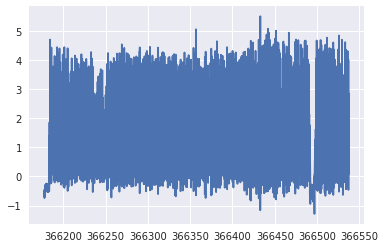

In [52]:
plt.plot(present.y)

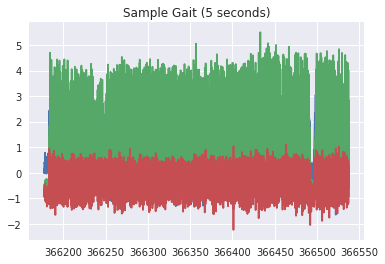

In [74]:
plt.title('Sample Gait (5 seconds)')
plt.plot(present)
#plt.savefig('5sec.png', dpi = 300)

# Sparsity Check

In [5]:
import os
import pandas as pd
# change this depending on data directory
directory_in_str = '/scratch/PI/euan/projects/mhc/data/6mwt/accel_walk_dir'
directory = os.fsencode(directory_in_str)

# number of gaps in a given 6MWT that surpasses the threshold 
def find_gaps(directory, table):
    '''
    Finds the number of gaps over 0.01 seconds and adds a gap if the difference between last and first timestamp is 
    less than 6 minutes
    Checking the length of the dict returned will show whether the amount of files matches the intersection of 
    6mwt table and demographics
    '''
    hc_gaps = dict()
    for subdir, dirs, files in os.walk(directory):
        # make in [list] a parameter of the function -- remember to change "in [list]" to the correct list
        if subdir.decode()[subdir.decode().rfind('/')+1:] in table:
            # Makes sure we only get one file per healthCode
            i = 0
            for file in files:
                while (i < 1):
                    a_df = pd.read_json(os.path.join(subdir.decode(), file.decode())).set_index('timestamp')
                    inst = list(a_df.index[1:]-a_df.index[:-1] > .02).count(True)
                    # This line checks for incomplete 6MWT
                    if (a_df.index[-1] - a_df.index[0]) < 358:
                        inst = inst + 1
                    hc_gaps.update({subdir.decode()[subdir.decode().rfind('/')+1:]: inst})
                    i += 1
                
    return hc_gaps




In [10]:
v2_only = find_gaps(directory, v2)

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


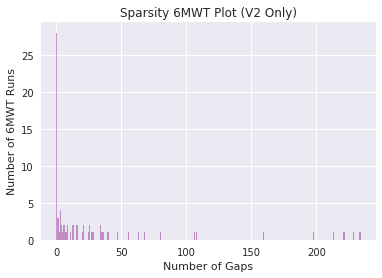

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

plt.title('Sparsity 6MWT Plot (V2 Only)')
# Set x-axis label
plt.xlabel('Number of Gaps')
# Set y-axis label
plt.ylabel('Number of 6MWT Runs')
sns.distplot(list(v2_only.values()), bins=250, kde=False, rug=False, color='purple')
plt.savefig('sparsity.png', dpi = 300)

# 6MWT Total Sample Check

### This block of code is not necessary anymore as it was just for verifying all of the 6MWT were present in the directory from a data pull.

### healthCodes of interest/associated synapse table:

1. cab9f4ee-54e0-4b08-8eba-3b48085bd142 (v4-v1)
2. 33f22bad-4570-43bb-bf68-263e6865ef76 (v4-v1)
3. ff489c8a-f5ff-4f00-9682-33c44df02621 (v4-v2)
4. 6fd3148e-f490-417a-9da8-a31d947e7aed (v4-v1)
5. bb6613c1-5b48-4744-a5f5-2387149da94d (v4-v2)
6. 43dcb6b4-24a9-4b71-bc9f-eef87e8adadb (v4-v2)
7. fe1e5f81-ed68-4c45-b1a7-3a7443d5ae76 (v4-v2)
8. 047b75f9-2778-4068-bc30-d47e8ea0780e (v4-v1)
9. c6a9c011-defc-48a9-bd74-de6d3a72d2bd (v4-v2)
10. e30dae44-8b7e-41a5-98e5-3f8abba35352 (v4-v1)

In [86]:
# hc_filenum is the dictionary which stores the healthCode and num of files associated with that healthCode

# num_of_files is just a list to count number of instances of certain number of files (Are there 0 files, 1 file...?)

directory_in_str = '/scratch/PI/euan/projects/mhc/data/6mwt/accel_walk_dir'
directory = os.fsencode(directory_in_str)
hc_filenum = dict()
for subdir, dirs, files in os.walk(directory):
    i = 0
    for file in files:
        i += 1
    hc_filenum.update({subdir.decode()[subdir.decode().rfind('/') + 1:]: i})


num_of_files = []
for k, v in test.items():
        num_of_files.append(v)

In [87]:
print(num_of_files.count(0))
print(len(hc_filenum))

2291
8129


/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


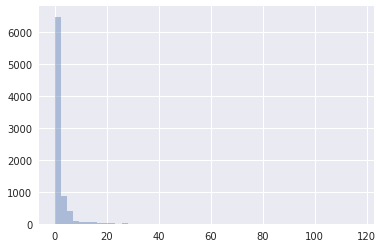

In [80]:
%matplotlib inline
sns.distplot(num_of_files, kde=False, rug=False)

# Feature Generation - 30 features
### Fix for the new dataframe format

In [31]:
import numpy as np
import peakutils
from numpy import linalg as LA
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Mean - 6 features
def get_time_mean(x_, y_, z_):
    mux_t = np.mean(x_, axis=1)
    muy_t = np.mean(y_, axis=1)
    muz_t = np.mean(z_, axis=1)
    return (mux_t, muy_t, muz_t)

def get_freq_mean(x_, y_, z_):
    mux_f = np.mean(np.absolute(fft(x_)), axis=1)
    muy_f = np.mean(np.absolute(fft(y_)), axis=1)
    muz_f = np.mean(np.absolute(fft(z_)), axis=1)
    return (mux_f, muy_f, muz_f)

# Median - 6 features
def get_time_median(x_, y_, z_):
    medx_t = np.median(x_, axis=1)
    medy_t = np.median(y_, axis=1)
    medz_t = np.median(z_, axis=1)
    return (medx_t, medy_t, medz_t)

def get_freq_median(x_, y_, z_):
    medx_f = np.median(np.absolute(fft(x_)), axis=1)
    medy_f = np.median(np.absolute(fft(y_)), axis=1)
    medz_f = np.median(np.absolute(fft(z_)), axis=1)
    return (medx_f, medy_f, medz_f)

# Magnitude - 6 features

# Don't really need magnitude since we already have 5 features from magnitude alone
#magx_t = (LA.norm(accelx_, axis=1) / 200)
#magy_t = (LA.norm(accely_, axis=1) / 200)
#magz_t = (LA.norm(accelz_, axis=1) / 200)

#magx_f = (LA.norm(fft(accelx_), axis=1) / 200)
#magy_f = (LA.norm(fft(accely_), axis=1) / 200)
#magz_f = (LA.norm(fft(accelz_), axis=1) / 200)

# Cross-correlation - 2 features

def get_cross_corr(x_, y_, z_):
    meanx = np.mean(x_, axis=1)
    meany = np.mean(y_, axis=1)
    meanz = np.mean(z_, axis=1)
    corr_xz = meanx/meanz
    corr_yz = meany/meanz
    return (corr_xz, corr_yz)

# Peak Count - 1 feature

# Don't really need this since we get peak count from magnitude
def peak_counter(accel_windows):
    '''
    This function counts the number of peaks in by window in each acceleration dimension using peakutils library
    Below we are averaging peaks over each dimension, combining all axes, and re-averaging for a final feature
    '''
    peaks = []
    for i in range(len(accel_windows)):
        peaks.append(len(peakutils.indexes(accel_windows[i])))
    return peaks

#peaks_x = np.mean(peak_counter(accelx_))
#peaks_y = np.mean(peak_counter(accely_))
#peaks_z = np.mean(peak_counter(accelz_))
#total = [peaks_x, peaks_y, peaks_z]
#avg_peaks = np.mean(total)

# Distance Between Peaks - 3 features

# Don't really want this...
def dist_peak(accel_windows):
    # This is in seconds because timestamps are in seconds not ms
    sec_per_index = 0.01
    time_diffs = []
    for i in range(len(accel_windows)):
        peak_indices = peakutils.indexes(accel_windows[i])
        # Finds difference between consecutive index values so that we can multiply by 0.01 seconds
        dummy = [t - s for s, t in zip(peak_indices, peak_indices[1:])]
        for j in range(len(dummy)):
            time_diffs.append(dummy[j] * sec_per_index)
    return time_diffs

# Spectral Centroid - 3 features

def spectral_centroid(x_, y_, z_):
    accel_freqx = fft(x_)
    accel_freqy = fft(y_)
    accel_freqz = fft(z_)
    centroids_x = []
    centroids_y = []
    centroids_z = []
    for i in range(len(x_)):
        sumx = 0
        sumy = 0
        sumz = 0
        for j in range(len(x_[i])):
            sumx += (x_[i][j] * accel_freqx[i][j] / 200)
            sumy += (y_[i][j] * accel_freqy[i][j] / 200)
            sumz += (z_[i][j] * accel_freqz[i][j] / 200)
        centroids_x.append(sumx)
        centroids_y.append(sumy)
        centroids_z.append(sumz)
    return (np.absolute(centroids_x), np.absolute(centroids_y), np.absolute(centroids_z))

# Average Difference from the Mean - 3 features

def average_dist_mean(x_, y_, z_, mux_t, muy_t, muz_t):
    realx = []
    realy = []
    realz = []
    dummyx = []
    dummyy = []
    dummyz = []
    for i in range(len(x_)):
        for j in range(len(x_[i])):
            dummyx.append(abs(x_[i][j] - mux_t[i]))
            dummyy.append(abs(y_[i][j] - muy_t[i]))
            dummyz.append(abs(z_[i][j] - muz_t[i]))
        realx.append(np.mean(dummyx))
        realy.append(np.mean(dummyy))
        realz.append(np.mean(dummyz))
    return (realx, realy, realz)

In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import json, os
from scipy.fftpack import fft, ifft
import itertools as it
import seaborn as sns
sns.set()

#directory_in_str = '/Users/bhargavyadavalli/Desktop/files'
#directory = os.fsencode(directory_in_str)

'''
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    print(filename[0:36])
'''
# The block above will print the file name without the '.json'


def moving_window(accelx, length, step=1):
    streams = it.tee(accelx, length)
    return zip(*[it.islice(stream, i, None, step + 99) for stream, i in zip(streams, it.count(step=step))])

'''
The following functions are for json files that aren't easily readable my pandas (deviceMotion)
'''
def getTimestamp(fn):
    timestamp = []
    with open(fn) as f:
        a = json.load(f)
        for obj in a:
            timestamp.append(obj['timestamp'])
    return timestamp

def getAccelX(fn):
    accelx = []
    with open(fn) as f:
        a = json.load(f)
        accelx = [obj['userAcceleration']['x'] for obj in a]
    accelx_norm = [(sample - np.mean(accelx)) for sample in accelx]
    for _ in range(200, len(accelx), 100):
        accelx_window = list(moving_window(accelx_norm, 200))
    accelx_window = np.asarray(accelx_window)
    return (accelx, accelx_window, accelx_norm)

def getAccelY(fn):
    accely = []
    with open(fn) as f:
        a = json.load(f)
        accely = [obj['y'] for obj in a]
    accely_norm = [(sample - np.mean(accely)) for sample in accely]
    for _ in range(200, len(accely), 100):
        accely_window = list(moving_window(accely_norm, 200))
    accelx_window = np.asarray(accely_window)
    return (accely, accely_window, accely_norm)
            
def getAccelZ(fn):
    accelz = []
    with open(fn) as f:
        a = json.load(f)
        accelz = [obj['z'] for obj in a]
    accelz_norm = [(sample - np.mean(accelz)) for sample in accelz]
    for _ in range(200, len(accelz), 100):
        accelz_window = list(moving_window(accelz_norm, 200))
    accelz_window = np.asarray(accelz_window)
    return (accelz, accelz_window, accelz_norm)


def normalize_dataset(dataframe):
    return (dataframe - dataframe.mean())


In [10]:
new_demographics = filter_demographics(csv)

In [11]:
from heapq import nlargest
from scipy.fftpack import fft
import peakutils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import linalg as LA
import itertools as it
import os

directory_in_str = '/scratch/PI/euan/projects/mhc/data/6mwt/accel_walk_dir'
directory = os.fsencode(directory_in_str)

def normalize_dataset(dataframe):
    return (dataframe - dataframe.mean())

def moving_window(accelx, length, step=1):
    streams = it.tee(accelx, length)
    return zip(*[it.islice(stream, i, None, step + 99) for stream, i in zip(streams, it.count(step=step))])

# prior to calling any of these functions please verify that dataframe is normalized & sliding windows are present
def fundamental_frequency(mag_):
    fundamental_freqs = []
    for mag_seg in mag_:
        ft_seg = fft(mag_seg)
        fundamental_freqs.append(LA.norm(np.mean(nlargest(3, ft_seg))))
    return np.asarray(fundamental_freqs)

def average_acceleration(mag_):
    return [np.mean(x) for x in mag_]

def peak_counter(mag_):
    '''
    This function counts the number of peaks in by window in each acceleration dimension using peakutils library
    Below we are averaging peaks over each dimension, combining all axes, and re-averaging for a final feature
    '''
    peaks = []
    for i in range(len(mag_)):
        peaks.append(len(peakutils.indexes(mag_[i])))
    return peaks


def find_max(mag_):
    maxes = [max(x) for x in mag_]
    return maxes

def find_min(mag_):
    mins = [min(x) for x in mag_]
    return mins

def generate_features(healthcode, fn, merged_demographics):
    '''
    Applies normalization and sliding windows to the provided data file and 
    returns a dataframe with calculated features
    '''
    a_df = normalize_dataset(pd.read_json(fn).set_index('timestamp'))
    a_df_norm = np.sqrt(np.square(a_df).sum(axis=1))
    mag = np.asarray(a_df_norm)
    mag_ = list(moving_window(mag, 200))
    x = np.asarray(a_df.x)
    y = np.asarray(a_df.y)
    z = np.asarray(a_df.z)
    x_ = list(moving_window(x, 200))
    y_ = list(moving_window(y, 200))
    z_ = list(moving_window(z, 200))
    index = [healthcode for x in range(len(mag_))]
    weight = [merged_demographics.loc[healthcode].weight for y in range(len(mag_))]
    height = [merged_demographics.loc[healthcode].height for z in range(len(mag_))]
    sex = [merged_demographics.loc[healthcode].sex for q in range(len(mag_))]
    currentAge = [merged_demographics.loc[healthcode].currentAge for m in range(len(mag_))]
    # Applied log transformation to the max feature
    return pd.DataFrame({'healthCode': index, 'weight': weight, 'height': height, 'sex': sex, 'currentAge': currentAge, 
                         'fundamental_freq': fundamental_frequency(mag_), 'average_accel': average_acceleration(mag_), 
                         'peakcount': peak_counter(mag_), 'max': find_max(mag_), 'min': np.log(find_min(mag_)),
                        'mut_x': get_time_mean(x_, y_, z_)[0], 'mut_y': get_time_mean(x_, y_, z_)[1], 
                        'mut_z': get_time_mean(x_, y_, z_)[2], 'muf_x': get_freq_mean(x_, y_, z_)[0],
                        'muf_y': get_freq_mean(x_, y_, z_)[1], 'muf_z': get_freq_mean(x_, y_, z_)[2],
                        'medt_x': get_time_median(x_, y_, z_)[0], 'medt_y': get_time_median(x_, y_, z_)[1],
                        'medt_z': get_time_median(x_, y_, z_)[2], 'medf_x': get_freq_median(x_, y_, z_)[0],
                        'medf_y': get_time_median(x_, y_, z_)[1], 'medf_z': get_freq_median(x_, y_, z_)[2],
                        'cross_xz': get_cross_corr(x_, y_, z_)[0], 'cross_yz': get_cross_corr(x_, y_, z_)[1],
                        'spect_cent_x': spectral_centroid(x_, y_, z_)[0], 
                        'spect_cent_y': spectral_centroid(x_, y_, z_)[1],
                        'spect_cent_z': spectral_centroid(x_, y_, z_)[2],
                        'average_dist_meanx': average_dist_mean(x_, y_, z_, np.mean(x_, axis=1), np.mean(y_, axis=1), np.mean(z_, axis=1))[0],
                        'average_dist_meany': average_dist_mean(x_, y_, z_, np.mean(x_, axis=1), np.mean(y_, axis=1), np.mean(z_, axis=1))[1],
                        'average_dist_meanz': average_dist_mean(x_, y_, z_, np.mean(x_, axis=1), np.mean(y_, axis=1), np.mean(z_, axis=1))[2]},
                          columns=['healthCode', 'weight', 'height', 'sex', 'currentAge', 'fundamental_freq', 
                         'average_accel', 'peakcount', 'max', 'min', 'mut_x', 'mut_y', 'mut_z',
                         'muf_x', 'muf_y', 'muf_z', 'medt_x', 'medt_y', 'medt_z', 'medf_x',
                         'medf_y', 'medf_z', 'cross_xz', 'cross_yz', 'spect_cent_x', 'spect_cent_y',
                         'spect_cent_z', 'average_dist_meanx', 'average_dist_meany', 'average_dist_meanz']).set_index('healthCode')




In [12]:
def filter_subjects(directory, table):
    # creates dict with healthcodes and number of gaps from find_gaps function
    new_dict = find_gaps(directory, table)
    # filters dict to remove those entries with more than 2 gaps
    filtered_new_dict = { k:v for k, v in new_dict.items() if v <= 10 }
    healthcodes = []
    for k, v in filtered_new_dict.items():
        healthcodes.append(k)
    return healthcodes

In [13]:
def create_frame(directory, table):
    '''
    Creates a final dataframe with all samples from valid healthcodes
    This: subdir.decode()[subdir.decode().rfind('/')+1:] just gets the healthcode part of a directory 
    Function should be slow with large amounts of files due to the concat Pandas function
    '''
    healthcodes = filter_subjects(directory, table)
    frames = []
    for subdir, dirs, files in os.walk(directory):
        if subdir.decode()[subdir.decode().rfind('/')+1:] in healthcodes:
            i = 0
            for file in files:
                while (i < 1):
                    # This line is generating our features dataframe with healthCode as first arg and filename as second arg
                    frames.append(generate_features(subdir.decode()[subdir.decode().rfind('/')+1:], 
                                                    os.path.join(subdir.decode(), file.decode()), 
                                                    filter_demographics(demographics_df, table)))
                    i += 1
    return pd.concat(frames)



In [ ]:
test_v4 = create_frame(directory, v4)

In [18]:
test_v2 = create_frame(directory, v2)

In [13]:
test_v1 = create_frame(directory, v1)

In [37]:
import cProfile
import re
import os

directory_in_str = '/scratch/PI/euan/projects/mhc/data/6mwt/accel_walk_dir'
directory = os.fsencode(directory_in_str)
table=v6
    
cProfile.run('create_frame(directory, table)')

         67364370 function calls (67084384 primitive calls) in 367.142 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     3361    0.011    0.000    0.012    0.000 <frozen importlib._bootstrap>:102(release)
     3361    0.004    0.000    0.004    0.000 <frozen importlib._bootstrap>:142(__init__)
     3361    0.010    0.000    0.052    0.000 <frozen importlib._bootstrap>:146(__enter__)
     3361    0.004    0.000    0.015    0.000 <frozen importlib._bootstrap>:153(__exit__)
     3361    0.017    0.000    0.028    0.000 <frozen importlib._bootstrap>:159(_get_module_lock)
     3361    0.002    0.000    0.002    0.000 <frozen importlib._bootstrap>:173(cb)
1848/1214    0.002    0.000    0.638    0.001 <frozen importlib._bootstrap>:197(_call_with_frames_removed)
    49425    0.017    0.000    0.017    0.000 <frozen importlib._bootstrap>:208(_verbose_message)
     1513    0.003    0.000    0.003    0.000 <frozen importlib._bootst

        9    0.000    0.000    0.006    0.001 internals.py:3686(eval)
      598    0.002    0.000    0.035    0.000 internals.py:3707(fillna)
     1794    0.007    0.000    0.407    0.000 internals.py:3713(astype)
    53380    0.026    0.000    0.026    0.000 internals.py:372(iget)
    14487    0.006    0.000    0.006    0.000 internals.py:3776(is_consolidated)
      905    0.004    0.000    0.016    0.000 internals.py:3784(_consolidate_check)
      905    0.002    0.000    0.012    0.000 internals.py:3785(<listcomp>)
        9    0.000    0.000    0.000    0.000 internals.py:3789(is_mixed_type)
    12960    0.018    0.000    0.026    0.000 internals.py:3812(is_view)
      317    0.003    0.000    0.108    0.000 internals.py:385(delete)
     1513    0.007    0.000    0.194    0.000 internals.py:3895(copy)
     1830    0.003    0.000    0.046    0.000 internals.py:3915(<lambda>)
     1513    0.002    0.000    0.048    0.000 internals.py:3916(<listcomp>)
       27    0.000    0.000    0.

In [10]:
test_v6 = create_frame(directory, v6)

In [6]:
# DATA FROM v4 only
tengaps_v4 = pd.read_hdf('tengaps_v4.h5', 'df')

In [3]:
newsemitotal_df = pd.concat([test_v2, test_v1, test_v6]).drop_duplicates()

NameError: name 'test_v2' is not defined

In [4]:
newsemitotal_df.to_hdf('newsemitotal_df.h5', key='df', mode='w')

NameError: name 'newsemitotal_df' is not defined

In [5]:
# DATA FROM v6, v2, v1
newsemitotal_df = pd.read_hdf('newsemitotal_df.h5', 'df')

In [7]:
tengaps_total = pd.concat([tengaps_v4, newsemitotal_df]).drop_duplicates()

In [23]:
# 315 total subjects in this data frame. Only 311 are usable due to outlier weight, age, height, etc
tengaps_total.to_hdf('tengaps_total.h5', key='df', mode='w')

In [9]:
# This means there are 315 unique subjects in this dataset
len(list(set(tengaps_total.index.values)))

315

In [14]:
# This is all of the tables together removing any duplicate runs that might appear between tables
# At this point we have not reduced to minimum number of samples 

# This is old and only has 175 total subjects. When filtered down it has 173 usable subjects.
newtotal_df = pd.concat([test_v4, test_v2, test_v1, test_v6]).drop_duplicates()

NameError: name 'test_v4' is not defined

In [ ]:
len(list(set(newtotal_df.index)))

In [34]:
newtotal_df.to_hdf('newtotal_df.h5', key='df', mode='w')

In [160]:
newtotal_df  = pd.read_hdf('newtotal_df.h5', 'df')

In [14]:
def filter_demographics(demographics, table):
    '''
    Gives a data frame for the demographic data that is associated with a table
    '''
    healthcodes = filter_subjects(directory, table)
    merged = pd.DataFrame()
    indexlist = list(demographics_df.healthCode)
    for e in list(set(healthcodes)):
        if e in indexlist:
            merged = merged.append(demographics_df.loc[demographics_df['healthCode'] == e])
    merged = merged.drop(['recordId'], axis=1)
    merged = merged.set_index('healthCode')
    return merged

def find_lowest_num_samples(total_df):
    '''
    This function finds the minimum number of samples from all of the runs present so that we keep same dimensions
    for every run that we have
    '''
    total = [len(total_df.loc[x].average_accel) for x in list(set(total_df.index))]
    return min(total)

def min_df(lowest_num_of_samples, total_df):
    '''
    Returns the dataframe with features for every healthCode present so that there are only the minimum amount of 
    samples needed
    '''
    newdf = pd.DataFrame()
    unique_healthcodes = list(set(total_df.index))
    for elem in unique_healthcodes:
        newdf = newdf.append(total_df.loc[elem].iloc[:lowest_num_of_samples])
    return newdf

# Random Forest - Authentication Proof
1. Start by separating training and testing data... 139 for train and 34 for test
2. Create output labels for every training example for i in range(1, 173)... for j in range(0, 351)...
3. Build Random Forest
4. Train

In [80]:
# These labels are for person authentication
# Bad use of double for loops here 

import numpy as np 
import pandas as pd 

labels  = []
for s in range (0, 139):
    for u in range(0, 352):
        labels.append(s)

In [81]:
# Lower the number of trees to reduce overfitting
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#lb = preprocessing.LabelBinarizer()
numOfTotalHC = 173
numOfTrainHC = 139
numOfTestHC = 34

# Shouldn't have to one-hot encode the sex because using random forest
# One-hot encode ouput
training = everything_no_demog.iloc[0:(numOfTrainHC * find_lowest_num_samples(newtotal_df))]

training.insert(25, 'class', labels)

X = np.array(training.iloc[:, 0:25])
X_scaled = preprocessing.scale(X)
y = np.array(training.iloc[:, 25])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

# Splits the training and testing into 80/20 with no sample scrambling
# Must scramble after so that training set has no test samples in it
#training = everything.iloc[0:(numOfTrainHC * find_lowest_num_samples(newtotal_df))]
testing = everything_no_demog.iloc[(numOfTrainHC * find_lowest_num_samples(newtotal_df)):]

#uniques, labeling = pd.factorize(training.sex)
#uniques2, labeling2 = pd.factorize(testing.sex)

#n = training.columns[2]
#training.drop(n, axis = 1, inplace = True)
#training.insert(2, 'sex', uniques)
# Male is 0 and Female is 1
#training['sex'] = training['sex'].astype(np.float64)
#training['peakcount'] = training['peakcount'].astype(np.float64)

#m = testing.columns[2]
#testing.drop(m, axis = 1, inplace = True)
#testing.insert(2, 'sex', uniques2)
# Male is 0 and Female is 1
#testing['sex'] = testing['sex'].astype(np.float64)
#testing['peakcount'] = testing['peakcount'].astype(np.float64)

# list of all of our features

#features = training.columns[:]

# labeling our unique outputs
#y = pd.factorize(training.index.values)[0]

clf = RandomForestClassifier(random_state=1)
clf.fit(X_scaled, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [85]:
i = 0
for e in clf.predict_proba(testing):
    print(max(e))
    i += 1
print(i)

0.2
0.3
0.1
0.1
0.2
0.2
0.2
0.2
0.2
0.2
0.1
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.2
0.3
0.3
0.2
0.3
0.2
0.2
0.2
0.2
0.2
0.3
0.3
0.3
0.3
0.3
0.2
0.2
0.3
0.3
0.3
0.3
0.2
0.2
0.2
0.2
0.1
0.1
0.1
0.2
0.1
0.1
0.2
0.2
0.2
0.2
0.2
0.1
0.1
0.2
0.1
0.2
0.1
0.1
0.2
0.2
0.2
0.2
0.1
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.1
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.1
0.1
0.1
0.1
0.1
0.2
0.2
0.2
0.2
0.2
0.2
0.1
0.1
0.2
0.2
0.2
0.2
0.1
0.1
0.2
0.1
0.2
0.2
0.2
0.2
0.2
0.2
0.1
0.1
0.1
0.2
0.2
0.1
0.1
0.1
0.2
0.2
0.2
0.2
0.2
0.2
0.3
0.2
0.2
0.1
0.1
0.1
0.2
0.2
0.2
0.1
0.1
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.1
0.2
0.2
0.2
0.1
0.2
0.2
0.2
0.2
0.1
0.2
0.2
0.2
0.2
0.1
0.2
0.2
0.3
0.2
0.2
0.3
0.2
0.3
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.1
0.1
0.1
0.1
0.2
0.2
0.2
0.1
0.1
0.1
0.1
0.2
0.3
0.3
0.2
0.1
0.3
0.2
0.2
0.2
0.2
0.2
0.1
0.2
0.1
0.1
0.1
0.1
0.1
0.2
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.1
0.1
0.2
0.2
0.2
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.2
0.2
0.2
0.1


0.1
0.2
0.4
0.3
0.2
0.2
0.3
0.2
0.2
0.3
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.1
0.2
0.2
0.2
0.2
0.2
0.1
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.1
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.1
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.1
0.1
0.1
0.1
0.2
0.1
0.2
0.3
0.3
0.2
0.1
0.1
0.1
0.1
0.1
0.2
0.3
0.3
0.2
0.1
0.1
0.2
0.3
0.2
0.3
0.1
0.3
0.3
0.3
0.1
0.2
0.1
0.1
0.1
0.3
0.2
0.1
0.3
0.1
0.1
0.2
0.2
0.2
0.2
0.2
0.1
0.2
0.2
0.1
0.3
0.2
0.1
0.3
0.1
0.2
0.1
0.1
0.2
0.3
0.3
0.1
0.3
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.2
0.2
0.3
0.1
0.3
0.1
0.3
0.3
0.3
0.3
0.2
0.1
0.2


0.2
0.2
0.2
0.2
0.2
0.2
0.1
0.1
0.2
0.2
0.1
0.2
0.2
0.2
0.2
0.2
0.1
0.2
0.2
0.2
0.1
0.1
0.1
0.1
0.2
0.3
0.2
0.1
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.1
0.2
0.2
0.1
0.1
0.2
0.2
0.2
0.2
0.1
0.1
0.2
0.1
0.1
0.2
0.2
0.1
0.1
0.1
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.3
0.2
0.1
0.2
0.1
0.2
0.2
0.1
0.2
0.2
0.2
0.2
0.2
0.1
0.1
0.2
0.2
0.1
0.1
0.1
0.1
0.1
0.2
0.1
0.2
0.1
0.1
0.1
0.1
0.1
0.2
0.2
0.2
0.1
0.2
0.2
0.1
0.1
0.2
0.2
0.2
0.1
0.2
0.1
0.2
0.2
0.2
0.1
0.1
0.2
0.2
0.1
0.1
0.1
0.2
0.2
0.2
0.1
0.1
0.1
0.2
0.2
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.1
0.2
0.1
0.2
0.2
0.2
0.1
0.1
0.1
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.1
0.3
0.2
0.1
0.2
0.1
0.1
0.2
0.2
0.2
0.2
0.3
0.3
0.2
0.1
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.1
0.2
0.2
0.2
0.2
0.2
0.1
0.1
0.1
0.2
0.2
0.2
0.3
0.3
0.3
0.2
0.1
0.1
0.1
0.1
0.2
0.2
0.1
0.1
0.2
0.1
0.1
0.1
0.2
0.2
0.2
0.1
0.1
0.1
0.1
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2


In [77]:
list(zip(training.columns.values[0:25], clf.feature_importances_))

[('fundamental_freq', 0.026474651627758826),
 ('average_accel', 0.04631644692338057),
 ('peakcount', 0.021864395065022968),
 ('max', 0.03461859298376712),
 ('min', 0.019363659436194596),
 ('mut_x', 0.03856840176118175),
 ('mut_y', 0.03464132438446853),
 ('mut_z', 0.03107869133787603),
 ('muf_x', 0.03452760007164057),
 ('muf_y', 0.040845533174714344),
 ('muf_z', 0.04045499877560984),
 ('medt_x', 0.026517579175127703),
 ('medt_y', 0.029857129054181385),
 ('medt_z', 0.03477163554338808),
 ('medf_x', 0.016900238505937994),
 ('medf_y', 0.030616780169017577),
 ('medf_z', 0.025492989581519965),
 ('cross_xz', 0.021731244008977586),
 ('cross_yz', 0.01887216663337867),
 ('spect_cent_x', 0.006134287371825502),
 ('spect_cent_y', 0.007940758823966615),
 ('spect_cent_z', 0.00894115022977494),
 ('average_dist_meanx', 0.13950772098392378),
 ('average_dist_meany', 0.12762016267264462),
 ('average_dist_meanz', 0.13634186170472043)]

In [78]:
preds = clf.predict(X_test)

In [79]:
list(y_test)

[127,
 8,
 135,
 81,
 128,
 44,
 53,
 103,
 42,
 81,
 84,
 88,
 56,
 40,
 3,
 50,
 63,
 118,
 19,
 130,
 107,
 53,
 54,
 35,
 84,
 42,
 72,
 119,
 85,
 27,
 27,
 124,
 68,
 50,
 81,
 50,
 21,
 113,
 116,
 25,
 111,
 71,
 59,
 65,
 25,
 27,
 8,
 16,
 40,
 137,
 112,
 24,
 107,
 122,
 8,
 112,
 68,
 114,
 6,
 5,
 126,
 94,
 115,
 15,
 95,
 44,
 111,
 137,
 120,
 56,
 95,
 114,
 4,
 124,
 21,
 100,
 11,
 113,
 114,
 57,
 108,
 84,
 89,
 109,
 135,
 41,
 114,
 126,
 36,
 5,
 55,
 5,
 74,
 76,
 70,
 105,
 13,
 130,
 109,
 12,
 9,
 71,
 86,
 63,
 78,
 47,
 93,
 73,
 4,
 41,
 73,
 10,
 136,
 116,
 49,
 104,
 57,
 43,
 134,
 73,
 62,
 8,
 88,
 138,
 81,
 12,
 112,
 108,
 115,
 70,
 89,
 11,
 0,
 60,
 99,
 11,
 103,
 95,
 71,
 85,
 42,
 82,
 29,
 113,
 18,
 84,
 114,
 116,
 88,
 13,
 83,
 100,
 135,
 114,
 35,
 16,
 107,
 0,
 100,
 134,
 22,
 89,
 116,
 18,
 136,
 5,
 85,
 78,
 76,
 15,
 59,
 108,
 110,
 93,
 37,
 82,
 14,
 93,
 79,
 81,
 108,
 52,
 67,
 3,
 26,
 22,
 18,
 108,
 43,
 62,
 90,
 

In [80]:
bools = []
for i in range(0, len(preds)):
    if preds[i] != y_test[i]:
        bools.append(False)

In [81]:
len(bools)

520

In [82]:
len(y_test)

16147

In [86]:
1 - (520/16147)

0.9677958753948102

# Very outdated plots of features
### Use df.pairplot() now

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


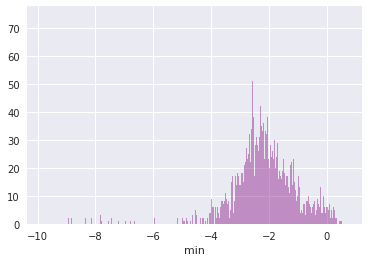

In [45]:
import seaborn as sns
sns.set()
sns.distplot(everything['min'], bins=10000, kde=False, rug=False, color='purple')

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


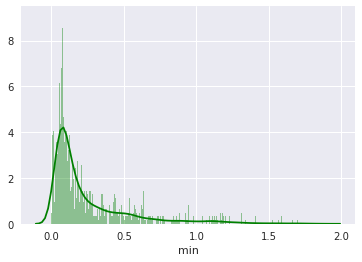

In [51]:
sns.distplot(total_df['min'], bins=10000, kde=True, rug=False, color='green')

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


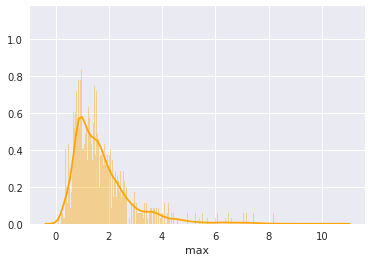

In [52]:
sns.distplot(total_df['max'], bins=10000, kde=True, rug=False, color='orange')

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


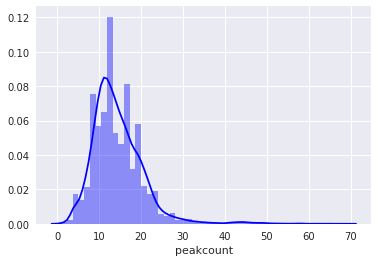

In [53]:
sns.distplot(total_df['peakcount'], bins=50, kde=True, rug=False, color='blue')

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


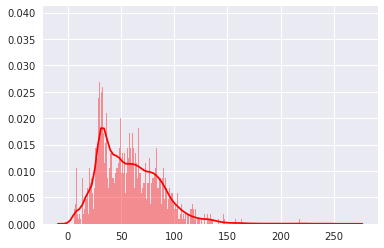

In [54]:
from numpy import linalg as LA
normed = [x for x in test_v4['fundamental_freq']]
sns.distplot(normed, bins= 10000, kde=True, rug=False, color='red')